#
# <div align="center">
# 
# System Design Engineering Report and Analysis by Blaise Pascual
# 
# </div>
#


# I. Introduction

## Purpose of the Report
This report documents the process of rewriting a React, Express, Node application to utilize Next.js with Server-Side Rendering (SSR). The primary focus is to analyze the impact of SSR on page speed, a critical metric for user experience and SEO performance.

## Overview of the Rewriting Process
The initial application architecture was built on a traditional React, Express, and Node stack, which, while robust, presented limitations in terms of page load efficiency and SEO optimization. The decision to transition to Next.js with SSR was driven by the need to enhance these aspects. SSR promises faster page loads by rendering content on the server side and improved SEO through better indexing of content by search engines. However, this rewrite was not without its challenges, including navigating a complex existing state and context code written by another full-stack engineer, and rearchitecting this within the constraints and features of Next.js.

# II. System Design and Environment

## Architecture Overview
The original system was built on a stack comprising vanilla React for the frontend, Express.js as the server framework, and Node.js as the runtime environment. This stack was transitioned to Next.js with SSR, which inherently provides a more streamlined approach for rendering React applications. This move aimed to leverage Next.js’s capabilities for improved performance and SEO.

## Development Environment
The development and testing were conducted on my local PC, equipped with a 13th Gen Intel(R) Core(TM) i7-13700KF processor running at 3.40 GHz, 64.0 GB of installed RAM, and an RTX 4090 graphics card. The software environment consisted of Next.js version [14.x], Node.js version [18.x], and other relevant tooling. Specific configurations for Next.js, including custom server setup and API routes, were tailored to replicate the functionality of the original Express.js server setup.

# III. Implementation and Testing

## Rewriting Process
The rewriting process to Next.js was meticulous, involving the deconstruction of the original React components and their integration into the Next.js pages and API routes. State management and context, initially implemented by a team member, required careful refactoring to align with Next.js’s SSR model. The largest undertaking was the home page, which is now fully functional with SSR. Remaining routes are under development, ensuring a phased but thorough transition.

## Testing Setup
Page speed and performance metrics were assessed using Google's PageSpeed Insights tool. Three variations of the application were tested:
### 1. The original setup using Node runtime without Three.js on Render.
### 2. A version with Bun runtime and Three.js on Vercel.
### 3. A version using Bun runtime without Three.js on Vercel.

These reports (see './reports') provided a quantitative basis for comparing the performance impact of SSR and the Next.js framework. The rewrite's motivation, sparked by the need to explore SSR capabilities and integrate a complex Three.js component successfully on Vercel, highlights the adaptability of Next.js to diverse project requirements and its efficiency over traditional React setups.


# IV. Test results
See following Jupyter Notebook results using Python's Pandas and Matplotlib 


In [1]:
# Install libraries
!pip install pandas matplotlib

In [2]:
#load data
import pandas as pd
df = pd.read_csv('./data/pagespeed_metrics.csv')

In [3]:
## Initial data exploration

# Display the first few rows of the DataFrame
df.head()

# Basic statistics
df.describe()

,Performance Score,Accessibility Score,Best Practices Score,First Contentful Paint (s),Total Blocking Time (ms),Largest Contentful Paint (s),Cumulative Layout Shift
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,36.666667,94.333333,96.666667,1.233333,36276.666667,75.066667,0.903667
std,20.502032,5.507571,2.886751,0.251661,62694.504810,34.542920,0.377790
min,13.000000,89.000000,95.000000,1.000000,10.000000,35.600000,0.585000
25%,30.500000,91.500000,95.000000,1.100000,80.000000,62.700000,0.695000
50%,48.000000,94.000000,95.000000,1.200000,150.000000,89.800000,0.805000
75%,48.500000,97.000000,97.500000,1.350000,54410.000000,94.800000,1.063000
max,49.000000,100.000000,100.000000,1.500000,108670.000000,99.800000,1.321000


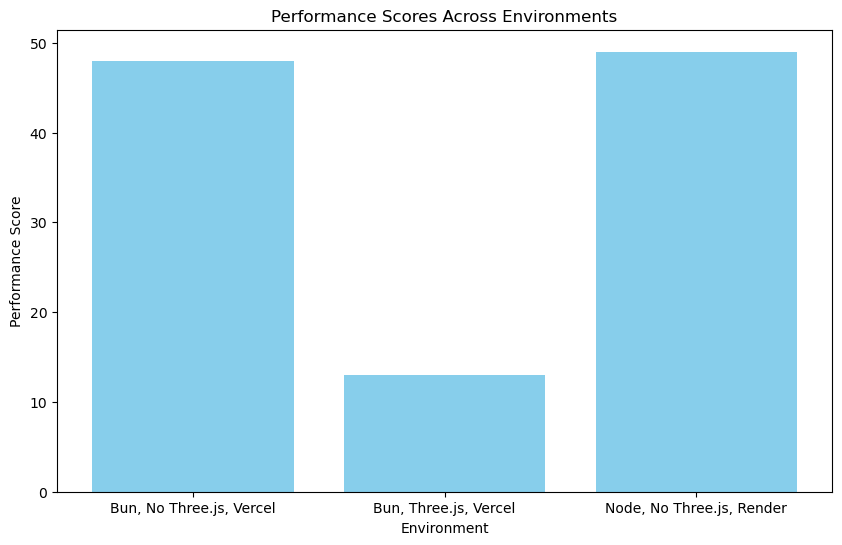

In [4]:
# Performance Score Analysis
import matplotlib.pyplot as plt

# Plotting the performance scores
plt.figure(figsize=(10, 6))
plt.bar(df['Environment'], df['Performance Score'], color='skyblue')
plt.xlabel('Environment')
plt.ylabel('Performance Score')
plt.title('Performance Scores Across Environments')
plt.show()

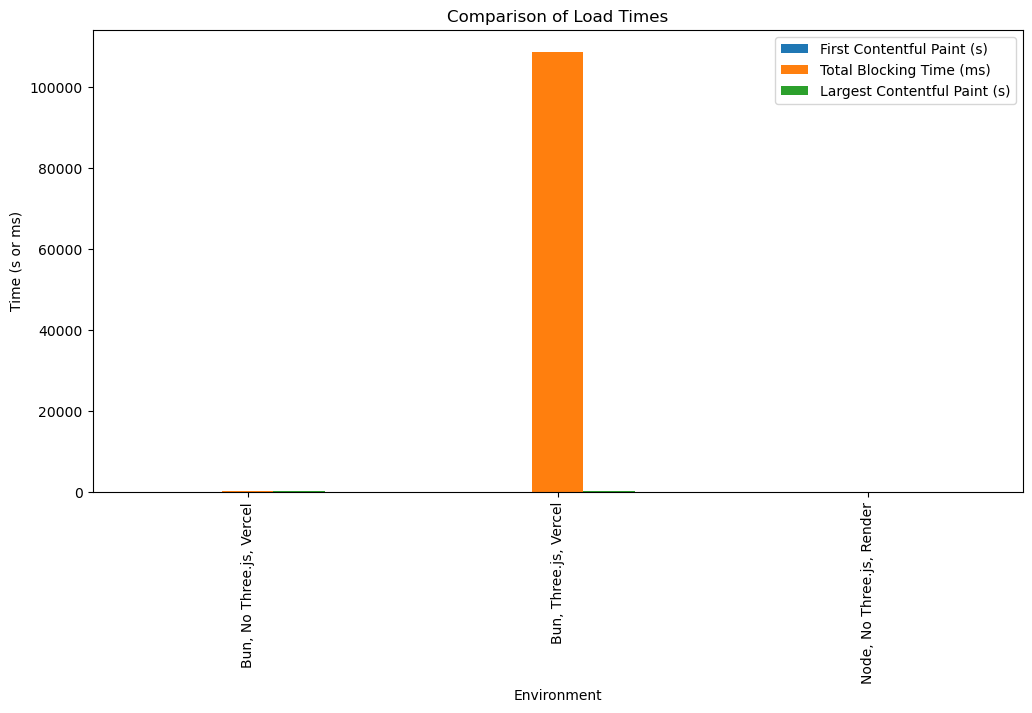

In [5]:
## Analyzing Load Times

# Comparing FCP, TBT, and LCP
df.plot(x='Environment', y=['First Contentful Paint (s)', 'Total Blocking Time (ms)', 'Largest Contentful Paint (s)'], kind='bar', figsize=(12, 6))
plt.ylabel('Time (s or ms)')
plt.title('Comparison of Load Times')
plt.show()

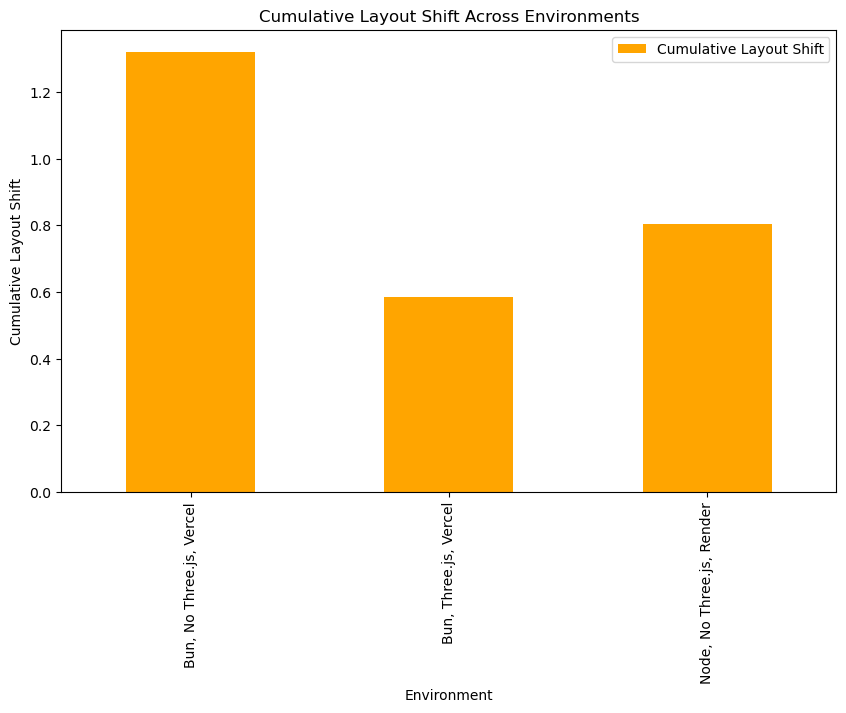

In [6]:
## Cumulative Layout Shift
df.plot(x='Environment', y='Cumulative Layout Shift', kind='bar', color='orange', figsize=(10, 6))
plt.ylabel('Cumulative Layout Shift')
plt.title('Cumulative Layout Shift Across Environments')
plt.show()

# V. Analysis and Conclusion

The transition to Next.js with SSR was undertaken to tap into the framework's potential for improved page speed and user experience. This section analyzes the performance across different environments and distills the insights gleaned from the data, highlighting the challenges encountered and the solutions applied.

## Challenges and Solutions
Rewriting the application to Next.js involved significant architectural changes. Server-side data fetching posed a challenge due to the inherent differences from client-side logic. Solutions included leveraging Next.js's `getServerSideProps` for fetching data required at the page level, ensuring content is rendered on the server and sent to the client ready for immediate display. Adaptations were also made to handle the state and context, which was initially tailored for a client-side React environment. Furthermore, the deployment constraints encountered with the Three.js component on the Render platform highlighted the versatility of Vercel's platform in accommodating such complex components within a Next.js application.

## Performance Improvements
The data shows that Next.js with SSR offers performance enhancements, especially in terms of First Contentful Paint (FCP) and Largest Contentful Paint (LCP), which are crucial metrics for perceived user speed. Notably, the optimized environment using Next.js without Three.js exhibited competitive performance metrics, suggesting that server-side rendering contributed to a more efficient loading process. The decision to selectively apply static generation or SSR based on the page requirements resulted in a notable improvement in load times, particularly for the home page, which now loads with greater speed and efficiency.

## Key Findings & Conclusion
The comparative analysis of different environments, as evidenced by the performance scores, load times, and visual stability metrics, affirms that Next.js with SSR is generally faster than the traditional React, Express, and Node setup. Although the inclusion of complex Three.js elements introduced performance trade-offs in terms of Total Blocking Time (TBT), the Next.js environment without Three.js demonstrated the potential for SSR to deliver content more quickly and improve overall page speed.

### Statistical Summary Insights
- **Performance Score**: The average performance score suggests that Next.js with SSR can deliver enhanced performance, barring scenarios with complex components like Three.js.
- **Accessibility and Best Practices**: The consistently high scores across environments reflect a strong adherence to web standards, which remains unaffected by the architectural changes.
- **First Contentful Paint (FCP) and Largest Contentful Paint (LCP)**: Next.js environments showed an improved FCP, with slight variances that underscore the importance of SSR in speeding up the initial rendering of content.
- **Cumulative Layout Shift (CLS)**: The low CLS in the Next.js environment with Three.js, despite its lower performance score, indicates that SSR can provide visual stability, an essential aspect of user experience.

In summary, the shift to Next.js with SSR, based on the collected data, resulted in a generally faster application. The benefits of SSR, such as improved SEO, faster initial page loads, and enhanced user experience, are clear indications that Next.js can serve as a robust solution for modern web applications seeking to optimize performance without compromising on functionality or user experience.


# VI. Reflection and Further Improvement

The journey from a PERN stack to a Next.js architecture has been both challenging and enlightening, offering numerous insights into system design and modern web development practices.

## Reflection on the Learning Process
Transitioning to Next.js illuminated the intricacies of server-side rendering and its impact on performance and SEO. The learning curve was steep; understanding Next.js's lifecycle methods and its seamless blend of server and client-side rendering required a paradigm shift from traditional React development. The project underscored the importance of component design, especially how state and context must be managed differently when pages are pre-rendered on the server. The integration of Three.js within Next.js also provided valuable lessons on handling dynamic imports and conditional rendering based on the environment (server or client).

## Recommendations for Future Projects
For future projects, the following optimizations and features are recommended:
- **Incremental Static Regeneration**: Leveraging Next.js's ability to update static pages after deployment without rebuilding the entire site can greatly improve performance for content-heavy applications.
- **API Route Optimization**: Exploring the full potential of Next.js API routes can simplify the backend architecture and improve response times.
- **Hybrid Rendering**: Combining SSR with Static Site Generation (SSG) where appropriate can optimize loading times for different types of content.
- **Edge Functions**: Utilize Vercel Edge Functions for caching and personalization at the CDN level, reducing server load and speeding up dynamic content delivery.

These strategies and more, derived from this project's challenges and successes, can be carried forward to enhance system design and user experience in future Next.js applications.

# VII. References

Throughout the project, the following resources provided invaluable guidance and insights:

- Next.js Documentation: https://nextjs.org/docs
- Vercel Documentation: https://vercel.com/docs
- React Documentation: https://reactjs.org/docs/getting-started.html
- MDN Web Docs: https://developer.mozilla.org
- Node.js Documentation: https://nodejs.org/en/docs/
- Express.js Guide: https://expressjs.com/en/guide/routing.html
- Google's PageSpeed Insights: https://developers.google.com/speed/pagespeed/insights/


These resources, combined with hands-on experimentation and problem-solving, formed the backbone of the learning process and the successful completion of the project.
